<a href="https://colab.research.google.com/github/rangkuti289/Portof/blob/master/CODIG%203.0%20Lomba%20Mercu%20Buana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparing**

In [ ]:
#menyiapkan library yang di perlukan
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
#menginput dataset yang di perlukan
from google.colab import files
uploaded = files.upload()

Saving 2010-2019.csv to 2010-2019.csv


In [ ]:
#menampilkan dataset
data = pd.read_csv('2010-2019.csv')
data

,Unnamed: 0,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,SLP,SLP_ATTRIBUTES,STP,STP_ATTRIBUTES,VISIB,VISIB_ATTRIBUTES,WDSP,WDSP_ATTRIBUTES,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,0.0,96685099999,2010-01-01,-3.442356,114.762553,20.11,"SYAMSUDIN NOOR, ID",80.2,6,76.7,6,1008.4,6,5.7,6,4.9,6,2.0,6,5.1,999.9,87.3,*,75.9,,0.78,B,999.9,10000
1,1.0,96685099999,2010-01-02,-3.442356,114.762553,20.11,"SYAMSUDIN NOOR, ID",80.6,15,76.5,15,1009.7,8,7.0,8,5.1,15,2.8,15,11.1,999.9,90.0,,75.9,,1.89,A,999.9,10010
2,2.0,96685099999,2010-01-03,-3.442356,114.762553,20.11,"SYAMSUDIN NOOR, ID",83.0,14,75.9,14,1009.1,7,6.4,7,6.3,14,3.1,14,6.0,999.9,89.6,,75.6,,0.00,I,999.9,0
3,3.0,96685099999,2010-01-04,-3.442356,114.762553,20.11,"SYAMSUDIN NOOR, ID",80.6,15,76.9,15,1008.7,8,6.0,8,5.5,15,2.3,15,5.1,999.9,90.0,,75.2,*,1.57,A,999.9,10000
4,4.0,96685099999,2010-01-05,-3.442356,114.762553,20.11,"SYAMSUDIN NOOR, ID",80.0,17,74.9,17,1009.7,8,7.0,8,6.2,17,3.8,17,8.9,999.9,86.0,,75.2,*,0.20,A,999.9,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618,NaN,96685099999,2019-12-27,-3.442356,114.762553,20.11,"SYAMSUDIN NOOR, ID",83.2,9,76.4,9,1009.3,8,7.2,8,5.7,9,4.0,9,7.0,999.9,92.8,,75.9,,0.00,I,999.9,0
3619,NaN,96685099999,2019-12-28,-3.442356,114.762553,20.11,"SYAMSUDIN NOOR, ID",82.8,8,77.0,8,1009.8,8,7.6,8,5.4,8,4.2,8,7.0,999.9,91.4,,72.7,*,99.99,,999.9,10010
3620,NaN,96685099999,2019-12-29,-3.442356,114.762553,20.11,"SYAMSUDIN NOOR, ID",81.3,8,76.6,8,1010.0,8,7.9,8,5.1,8,4.0,8,9.9,999.9,89.6,,71.8,,0.03,A,999.9,10000
3621,NaN,96685099999,2019-12-30,-3.442356,114.762553,20.11,"SYAMSUDIN NOOR, ID",82.1,7,76.2,7,1010.3,7,8.1,7,5.5,7,4.0,7,6.0,999.9,92.8,*,73.8,,0.94,A,999.9,10000


In [ ]:
#colum yang berada pada data set
data.columns

Index(['Unnamed: 0', 'STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'NAME', 'TEMP', 'TEMP_ATTRIBUTES', 'DEWP', 'DEWP_ATTRIBUTES', 'SLP',
       'SLP_ATTRIBUTES', 'STP', 'STP_ATTRIBUTES', 'VISIB', 'VISIB_ATTRIBUTES',
       'WDSP', 'WDSP_ATTRIBUTES', 'MXSPD', 'GUST', 'MAX', 'MAX_ATTRIBUTES',
       'MIN', 'MIN_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNDP', 'FRSHTT'],
      dtype='object')

In [ ]:
#mengelompokan record
data['TEMP'][data['TEMP']<=70] = 70
data['TEMP'][(data['TEMP']>70) & (data['TEMP']<80) ] = 75
data['TEMP'][data['TEMP']>=80] = 80
data['TEMP'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

80.0    2864
75.0     759
Name: TEMP, dtype: int64

# **CLEANING DATA**

In [ ]:
#menghapus atribut yang tidak di gunakan
datafiltered = data.drop(['Unnamed: 0','STATION','NAME', 'TEMP_ATTRIBUTES', 'DEWP', 'DEWP_ATTRIBUTES', 'SLP','SLP_ATTRIBUTES', 'STP', 'STP_ATTRIBUTES', 'VISIB', 'VISIB_ATTRIBUTES', 'WDSP_ATTRIBUTES','GUST', 'MAX_ATTRIBUTES', 'MIN_ATTRIBUTES','PRCP_ATTRIBUTES', 'SNDP', 'FRSHTT'], axis = 1)

In [ ]:
#pengecekan data
datafiltered

,DATE,LATITUDE,LONGITUDE,ELEVATION,TEMP,WDSP,MXSPD,MAX,MIN,PRCP
0,2010-01-01,-3.442356,114.762553,20.11,80.0,2.0,5.1,87.3,75.9,0.78
1,2010-01-02,-3.442356,114.762553,20.11,80.0,2.8,11.1,90.0,75.9,1.89
2,2010-01-03,-3.442356,114.762553,20.11,80.0,3.1,6.0,89.6,75.6,0.00
3,2010-01-04,-3.442356,114.762553,20.11,80.0,2.3,5.1,90.0,75.2,1.57
4,2010-01-05,-3.442356,114.762553,20.11,80.0,3.8,8.9,86.0,75.2,0.20
...,...,...,...,...,...,...,...,...,...,...
3618,2019-12-27,-3.442356,114.762553,20.11,80.0,4.0,7.0,92.8,75.9,0.00
3619,2019-12-28,-3.442356,114.762553,20.11,80.0,4.2,7.0,91.4,72.7,99.99
3620,2019-12-29,-3.442356,114.762553,20.11,80.0,4.0,9.9,89.6,71.8,0.03
3621,2019-12-30,-3.442356,114.762553,20.11,80.0,4.0,6.0,92.8,73.8,0.94


In [ ]:
#mengecek data yang kosong
datafiltered.isnull().any()

DATE         False
LATITUDE     False
LONGITUDE    False
ELEVATION    False
TEMP         False
WDSP         False
MXSPD        False
MAX          False
MIN          False
PRCP         False
dtype: bool

# **PROCESSING**

In [ ]:
#menentukan variabel independen mempengaruhi
X = datafiltered[['LATITUDE','LONGITUDE', 'ELEVATION', 'WDSP', 'MXSPD', 'MAX', 'MIN','PRCP']] .values  #.astype(float)
X[0:5]

array([[ -3.442356, 114.762553,  20.11    ,   2.      ,   5.1     ,
         87.3     ,  75.9     ,   0.78    ],
       [ -3.442356, 114.762553,  20.11    ,   2.8     ,  11.1     ,
         90.      ,  75.9     ,   1.89    ],
       [ -3.442356, 114.762553,  20.11    ,   3.1     ,   6.      ,
         89.6     ,  75.6     ,   0.      ],
       [ -3.442356, 114.762553,  20.11    ,   2.3     ,   5.1     ,
         90.      ,  75.2     ,   1.57    ],
       [ -3.442356, 114.762553,  20.11    ,   3.8     ,   8.9     ,
         86.      ,  75.2     ,   0.2     ]])

In [ ]:
#menentukan variabel dependen dipengaruhi
y = datafiltered['TEMP'].values
y[0:5]

array([80., 80., 80., 80., 80.])

In [ ]:
#membagi data menjadi data testing dan data training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2898, 8) (2898,)
Test set: (725, 8) (725,)


In [ ]:
#Mengklasifikasikan dan mengimport KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#prediksi
yhat = knn.predict(X_test)
yhat [0:50]


NameError: ignored

In [ ]:
#menghitung tingkat akurasi data prediksi
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8992408557625949
Test set Accuracy:  0.8993103448275862


In [ ]:
#mencari tingkat akurasi terbaik berdasarkan K (Tetangga)
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.85241379, 0.84137931, 0.88413793, 0.87862069, 0.89931034,
       0.89793103, 0.89931034, 0.89655172, 0.90206897])

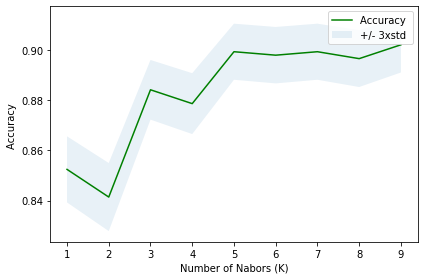

In [ ]:
#menampilkan grafik berdasarkan nilai akurasi K 
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [ ]:
#mencari akurasi terbaik dengan K keberapa
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9020689655172414 with k= 9
